# **Homework 2**

Due by **March 2, 2023**

**Question 1**: Please design a logistic regression algorithm to realize binary-class classification on the data in Data_HW_2.csv.
*   Please provide the code, training error, and testing error.

In [ ]:
#update mlxtend 
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# imported libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions

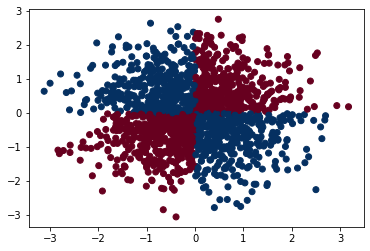

In [ ]:
# get data and show plot
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HWs/HW2/Data_HW_2.csv')
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y'].values
plt.scatter(x_data[:,0], x_data[:,1], c=y_data, cmap="RdBu")
plt.show()
# make training and test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Designed the logistic regression model
model1 = models.Sequential()
model1.add(layers.Normalization(input_shape = [2,], axis = None))
model1.add(layers.Dense(1, activation = 'sigmoid'))
model1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_17 (Normaliza  (None, 2)                3         
 tion)                                                           
                                                                 
 dense_42 (Dense)            (None, 1)                 3         
                                                                 
Total params: 6
Trainable params: 3
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Compiled and trained model
adam = optimizers.Adam(learning_rate=0.3)
model1.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
33/33 [==============================] - 2s 14ms/step - loss: 0.8332 - accuracy: 0.5181 - val_loss: 0.8461 - val_accuracy: 0.5000
Epoch 2/300
33/33 [==============================] - 0s 4ms/step - loss: 0.8257 - accuracy: 0.5181 - val_loss: 0.8386 - val_accuracy: 0.5022
Epoch 3/300
33/33 [==============================] - 0s 4ms/step - loss: 0.8187 - accuracy: 0.5190 - val_loss: 0.8309 - val_accuracy: 0.5022
Epoch 4/300
33/33 [==============================] - 0s 5ms/step - loss: 0.8116 - accuracy: 0.5162 - val_loss: 0.8241 - val_accuracy: 0.5022
Epoch 5/300
33/33 [==============================] - 0s 6ms/step - loss: 0.8052 - accuracy: 0.5190 - val_loss: 0.8170 - val_accuracy: 0.5044
Epoch 6/300
33/33 [==============================] - 0s 4ms/step - loss: 0.7987 - accuracy: 0.5200 - val_loss: 0.8106 - val_accuracy: 0.5044
Epoch 7/300
33/33 [==============================] - 0s 5ms/step - loss: 0.7927 - accuracy: 0.5210 - val_loss: 0.8041 - val_accuracy: 0.5044
Epoch 8/300


3888/3888 [==============================] - 5s 1ms/step


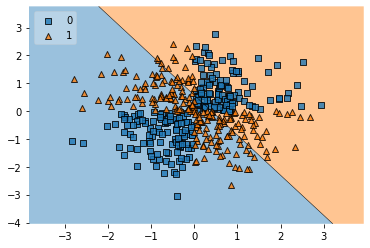

15/15 - 0s - loss: 0.6931 - accuracy: 0.4000 - 52ms/epoch - 3ms/step
0.4000000059604645


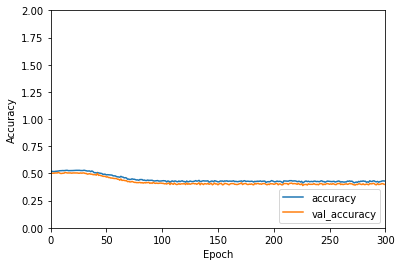

In [ ]:
# Evaluated the fully Model and plot results
plot_decision_regions(x_test, y_test, clf=model1, legend=2)
plt.show()
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

**Question 2**: Please design a fully-connected neural network (FCNN) algorithm to realize binary-class classification on the data in Data_HW_2.csv. The structure of FCNN should meet the following requirements: 1) the FCNN should have one hidden layer, 2) the hidden layer should have 2 nodes,  and 3) the activation functions should be Sigmoid.
*   Please provide the code, training error, and testing error.

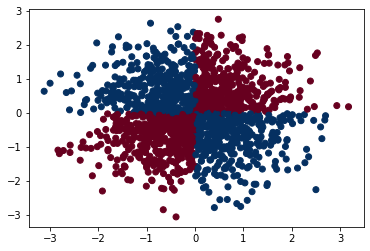

In [ ]:
# get data and show plot
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HWs/HW2/Data_HW_2.csv')
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y'].values
plt.scatter(x_data[:,0], x_data[:,1], c=y_data, cmap="RdBu")
plt.show()
#train
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Designed the fully-connected neural network
# 1 input layer with two nodes, one hidden layer two nodes, and one output layer with one node
model2 = models.Sequential()
model2.add(layers.Normalization(input_shape = [2,], axis = None))
model2.add(layers.Dense(2, activation='sigmoid'))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_18 (Normaliza  (None, 2)                3         
 tion)                                                           
                                                                 
 dense_43 (Dense)            (None, 2)                 6         
                                                                 
 dense_44 (Dense)            (None, 1)                 3         
                                                                 
Total params: 12
Trainable params: 9
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Compiled and trained the fully-connected NN model
adam = optimizers.Adam(learning_rate=0.3)
model2.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
33/33 [==============================] - 1s 10ms/step - loss: 0.7381 - accuracy: 0.4848 - val_loss: 0.7183 - val_accuracy: 0.4956
Epoch 2/300
33/33 [==============================] - 0s 4ms/step - loss: 0.7300 - accuracy: 0.4829 - val_loss: 0.7126 - val_accuracy: 0.5000
Epoch 3/300
33/33 [==============================] - 0s 4ms/step - loss: 0.7232 - accuracy: 0.4857 - val_loss: 0.7074 - val_accuracy: 0.5044
Epoch 4/300
33/33 [==============================] - 0s 4ms/step - loss: 0.7173 - accuracy: 0.4829 - val_loss: 0.7033 - val_accuracy: 0.5067
Epoch 5/300
33/33 [==============================] - 0s 5ms/step - loss: 0.7126 - accuracy: 0.4971 - val_loss: 0.7001 - val_accuracy: 0.5111
Epoch 6/300
33/33 [==============================] - 0s 5ms/step - loss: 0.7085 - accuracy: 0.4867 - val_loss: 0.6976 - val_accuracy: 0.5067
Epoch 7/300
33/33 [==============================] - 0s 8ms/step - loss: 0.7053 - accuracy: 0.4981 - val_loss: 0.6957 - val_accuracy: 0.5200
Epoch 8/300


3888/3888 [==============================] - 5s 1ms/step


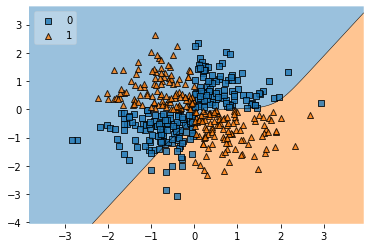

15/15 - 0s - loss: 0.5651 - accuracy: 0.6600 - 79ms/epoch - 5ms/step
0.6600000262260437


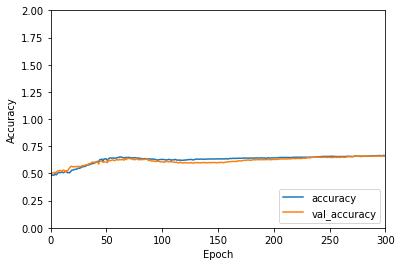

In [ ]:
# Evaluated the fully connected neural network Model
plot_decision_regions(x_test, y_test, clf=model2, legend=2)
plt.show()
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

**Question 3**: Please design a fully-connected neural network (FCNN) algorithm to realize binary-class classification on the data in Data_HW_2.csv. The structure of FCNN should meet the following requirements: 1) the FCNN should have two hidden layers, 2) the first hidden layer should have 3 nodes and the second hidden layer should have 2 nodes,  and 3) the activation functions should be Sigmoid.
*   Please provide the code, training error, and testing error.

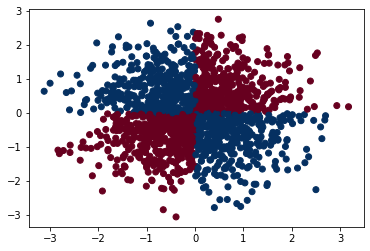

In [ ]:
# get data and show plot
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HWs/HW2/Data_HW_2.csv')
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y'].values
plt.scatter(x_data[:,0], x_data[:,1], c=y_data, cmap="RdBu")
plt.show()
#train
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Designed the fully-connected neural network 
# 1 input layer with two nodes, two hidden layers with 3 and 2 nodes, and one output layer with one node
model2 = models.Sequential()
model2.add(layers.Normalization(input_shape = [2,], axis = None))
model2.add(layers.Dense(3, activation='sigmoid'))
model2.add(layers.Dense(2, activation='sigmoid'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_19 (Normaliza  (None, 2)                3         
 tion)                                                           
                                                                 
 dense_45 (Dense)            (None, 3)                 9         
                                                                 
 dense_46 (Dense)            (None, 2)                 8         
                                                                 
 dense_47 (Dense)            (None, 1)                 3         
                                                                 
Total params: 23
Trainable params: 20
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Compiled and trained the fully-connected NN model
adam = optimizers.Adam(learning_rate=0.3)
model2.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
33/33 [==============================] - 2s 16ms/step - loss: 0.6991 - accuracy: 0.4743 - val_loss: 0.6915 - val_accuracy: 0.5200
Epoch 2/300
33/33 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.4743 - val_loss: 0.6915 - val_accuracy: 0.5200
Epoch 3/300
33/33 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4962 - val_loss: 0.6921 - val_accuracy: 0.6311
Epoch 4/300
33/33 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4600 - val_loss: 0.6929 - val_accuracy: 0.4444
Epoch 5/300
33/33 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5238 - val_loss: 0.6937 - val_accuracy: 0.4800
Epoch 6/300
33/33 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5257 - val_loss: 0.6937 - val_accuracy: 0.4800
Epoch 7/300
33/33 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5257 - val_loss: 0.6945 - val_accuracy: 0.4800
Epoch 8/300


3888/3888 [==============================] - 6s 1ms/step


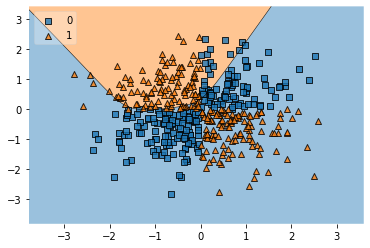

15/15 - 0s - loss: 0.5467 - accuracy: 0.6489 - 76ms/epoch - 5ms/step
0.648888885974884


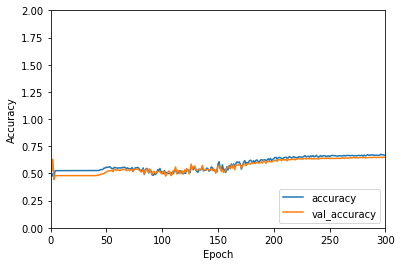

In [ ]:
# Evaluated the fully connected neural network Model
plot_decision_regions(x_test, y_test, clf=model2, legend=2)
plt.show()
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

**Question 4**: Please design a fully-connected neural network (FCNN) algorithm to realize binary-class classification on the data in Data_HW_2.csv. The structure of FCNN should meet the following requirements: 1) the FCNN should have two hidden layers, 2) the first hidden layer should have 3 nodes and the second hidden layer should have 2 hode,  and 3) the activation functions for the hidden layers should be ReLu.
*   Please provide the code, training error, and testing error.

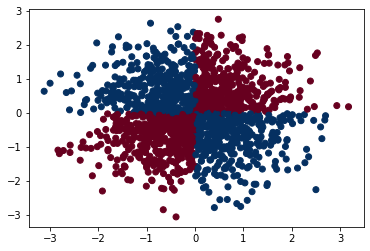

In [ ]:
# get data and show plot
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HWs/HW2/Data_HW_2.csv')
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y'].values
plt.scatter(x_data[:,0], x_data[:,1], c=y_data, cmap="RdBu")
plt.show()
#train
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Designed the fully-connected neural network
# one input layer with two nodes, two hidden layers with 3 and 2 nodes using ReLu, and one output layer with one node
model2 = models.Sequential()
model2.add(layers.Normalization(input_shape = [2,], axis = None))
model2.add(layers.Dense(3, activation='relu'))
model2.add(layers.Dense(2, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_20 (Normaliza  (None, 2)                3         
 tion)                                                           
                                                                 
 dense_48 (Dense)            (None, 3)                 9         
                                                                 
 dense_49 (Dense)            (None, 2)                 8         
                                                                 
 dense_50 (Dense)            (None, 1)                 3         
                                                                 
Total params: 23
Trainable params: 20
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Compiled and trained the fully-connected NN model
adam = optimizers.Adam(learning_rate=0.3)
model2.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
33/33 [==============================] - 2s 15ms/step - loss: 0.8201 - accuracy: 0.3533 - val_loss: 0.7813 - val_accuracy: 0.4244
Epoch 2/300
33/33 [==============================] - 0s 5ms/step - loss: 0.7893 - accuracy: 0.4514 - val_loss: 0.7551 - val_accuracy: 0.4622
Epoch 3/300
33/33 [==============================] - 0s 6ms/step - loss: 0.7666 - accuracy: 0.4505 - val_loss: 0.7351 - val_accuracy: 0.4622
Epoch 4/300
33/33 [==============================] - 0s 6ms/step - loss: 0.7493 - accuracy: 0.4457 - val_loss: 0.7193 - val_accuracy: 0.4778
Epoch 5/300
33/33 [==============================] - 0s 5ms/step - loss: 0.7355 - accuracy: 0.4543 - val_loss: 0.7079 - val_accuracy: 0.4933
Epoch 6/300
33/33 [==============================] - 0s 6ms/step - loss: 0.7249 - accuracy: 0.4619 - val_loss: 0.6988 - val_accuracy: 0.5089
Epoch 7/300
33/33 [==============================] - 0s 7ms/step - loss: 0.7165 - accuracy: 0.4752 - val_loss: 0.6916 - val_accuracy: 0.5333
Epoch 8/300


3888/3888 [==============================] - 8s 2ms/step


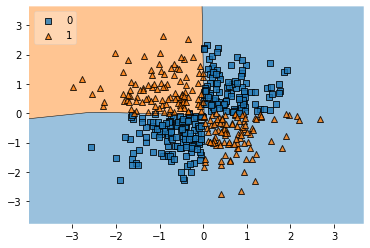

15/15 - 0s - loss: 0.4851 - accuracy: 0.7644 - 53ms/epoch - 4ms/step
0.7644444704055786


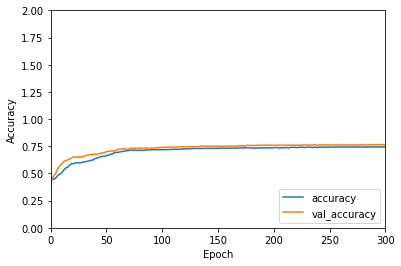

In [ ]:
# Evaluated the fully connected neural network Model
plot_decision_regions(x_test, y_test, clf=model2, legend=2)
plt.show()
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)
print(test_acc)